In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
import scipy
from tqdm import tqdm
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()

# Data

**In this part, we would like to identify, what is actual traffic dynamics looks like at the D004 and D107 to obtain Speed, Flow, Density (10 seconds aggregated)**

Please note that, 10 seconds aggregated data shows time between 5:00 am to 10:00 am.

In [2]:
DATA_FOLDER = 'LAM data'

In [3]:
def select_right_direction(df):
    
    dirHelsinki = df.direction == 'Helsinki'
    return df[dirHelsinki]

def cp_delta_seconds(df):
    def f(x): 
        # Return number of seconds elapsed since midnight
        return x['hour']*60**2 + x['minute']*60 + x['second'] + x['hunderths of a second']/100
    
    df = df.assign(total_sec=df.apply(f, axis=1))
    return df

def cp_speed_and_flow(df, start_hour=5, stop_hour=10, path=10, half_window=120):
    
    df = select_right_direction(df)
    df = cp_delta_seconds(df)
    
    start_sec = start_hour*60**2
    stop_sec = stop_hour*60**2
    
    current = start_sec
    
    n_step = int((stop_sec - start_sec) / path)
    
    speed = np.zeros(n_step)
    flow = np.zeros(n_step)
    
    for i in tqdm(range(n_step)):
    
        a, b = current-half_window, current+half_window
        belong_to_i = (a <= df.total_sec) & (df.total_sec < b)
        idx_belong_to_i = df[belong_to_i].index
        if len(idx_belong_to_i) == 0:
            raise ValueError("Not enough data!!!")
        speed_i = df.loc[idx_belong_to_i, 'speed'].mean()
        flow_i = len(idx_belong_to_i) / (b-a) * 60**2
        speed[i] = speed_i
        flow[i] = flow_i
        current += path
        
    return speed, flow

## Detector 004
**We will input traffic volume from this detector, it is localed as C0(origin) of the network.**

In [4]:
data_file_north = os.path.join(DATA_FOLDER, 'lamraw_4_18_276.xlsx')

df_n = pd.read_excel(data_file_north)
df_n

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,4,18,276,0,0,8,99,1960-03-01 00:00:00,2,Hämeenlinna,1,92,0,899,-2,0
1,4,18,276,0,0,9,53,1980-03-01 00:00:00,3,Hämeenlinna,1,102,0,953,-2,0
2,4,18,276,0,0,18,4,1960-03-01 00:00:00,2,Hämeenlinna,1,101,0,1804,890,0
3,4,18,276,0,0,41,99,1980-03-01 00:00:00,6,Helsinki,1,106,0,4199,-2,0
4,4,18,276,0,0,46,99,22.20,5,Helsinki,5,92,0,4699,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64823,4,18,276,23,59,19,99,1960-03-01 00:00:00,2,Hämeenlinna,1,93,0,8635999,4286,0
64824,4,18,276,23,59,20,63,1960-03-01 00:00:00,2,Hämeenlinna,1,95,0,8636063,50,0
64825,4,18,276,23,59,21,99,2020-03-01 00:00:00,2,Hämeenlinna,1,89,0,8636199,122,0
64826,4,18,276,23,59,31,99,1960-06-01 00:00:00,2,Hämeenlinna,1,99,0,8637199,987,0


In [5]:
speed, flow = cp_speed_and_flow(df_n)
density = flow/speed

100%|██████████| 1800/1800 [00:02<00:00, 671.82it/s]


**10 seconds aggregated density**

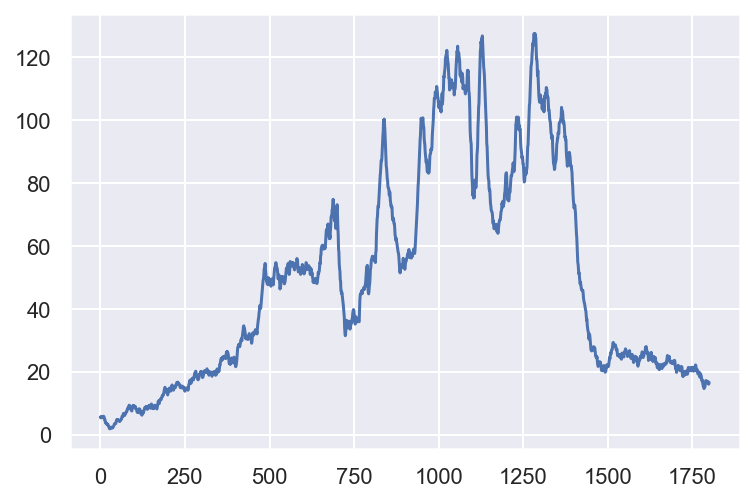

In [6]:
plt.plot(density);

**10 seconds aggregated speed**

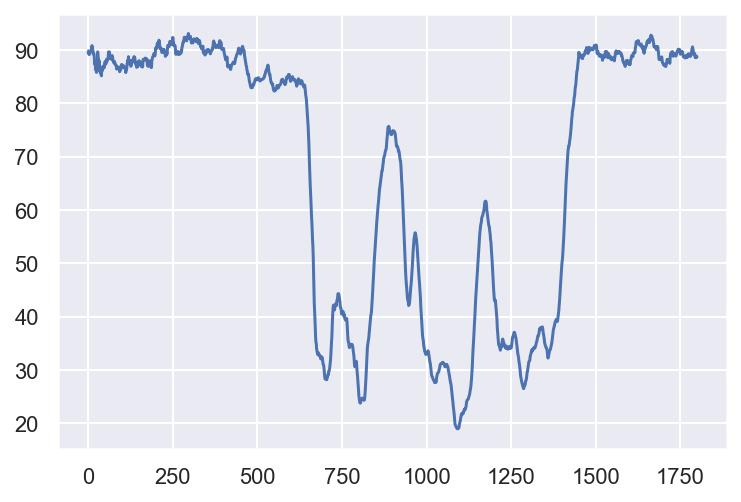

In [7]:
plt.plot(speed);

**10 seconds aggregated flow**

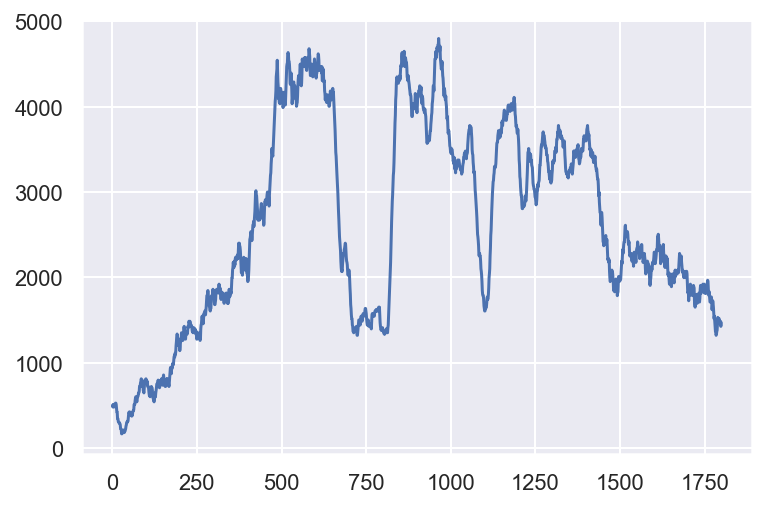

In [8]:
plt.plot(flow);

## South

In [9]:
data_file_south = os.path.join(DATA_FOLDER, 'lamraw_107_18_276.xlsx')
df_s = pd.read_excel(data_file_south)
df_s

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,107,18,276,0,0,11,15,1940-03-01 00:00:00,1,Hämeenlinna,1,83,0,1115,-2,0
1,107,18,276,0,0,20,55,1960-03-01 00:00:00,4,Helsinki,1,76,0,2055,-2,0
2,107,18,276,0,1,36,4,1940-03-01 00:00:00,1,Hämeenlinna,1,81,0,9604,8474,0
3,107,18,276,0,2,8,14,1940-04-01 00:00:00,1,Hämeenlinna,1,93,0,12814,3194,0
4,107,18,276,0,2,18,33,6.00,3,Helsinki,1,79,0,13833,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,107,18,276,23,58,58,0,1980-03-01 00:00:00,4,Helsinki,1,85,0,8633800,4283,0
60271,107,18,276,23,59,5,83,16.00,4,Helsinki,4,58,0,8634583,766,0
60272,107,18,276,23,59,12,48,1980-03-01 00:00:00,4,Helsinki,1,84,0,8635248,565,0
60273,107,18,276,23,59,31,63,4.00,1,Hämeenlinna,1,86,0,8637163,9076,0


In [10]:
speed_s, flow_s = cp_speed_and_flow(df_s)
density_s = flow_s/speed_s

100%|██████████| 1800/1800 [00:03<00:00, 465.62it/s]


**Comparing D004 (North) and D107 (South) 10 seconds aggregated Density**

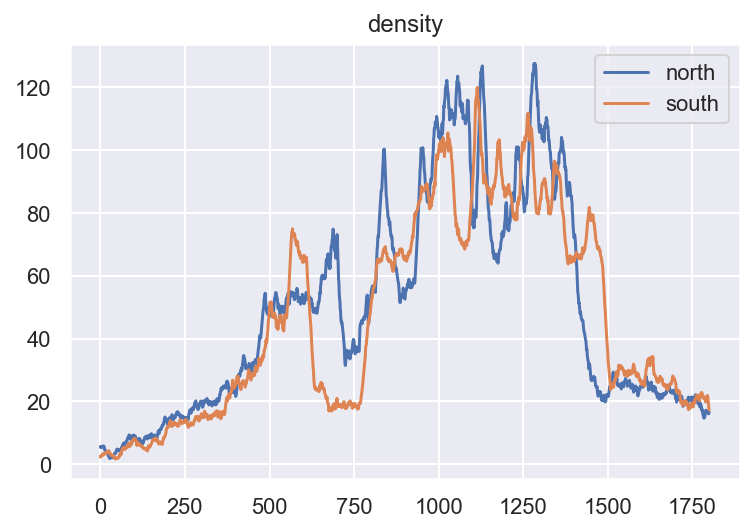

In [11]:
fig, ax = plt.subplots()
ax.plot(density, label="north")
ax.plot(density_s, label="south")
ax.set_title("density")
ax.legend();

**Comparing D004 (North) and D107 (South) 10 seconds aggregated speed**

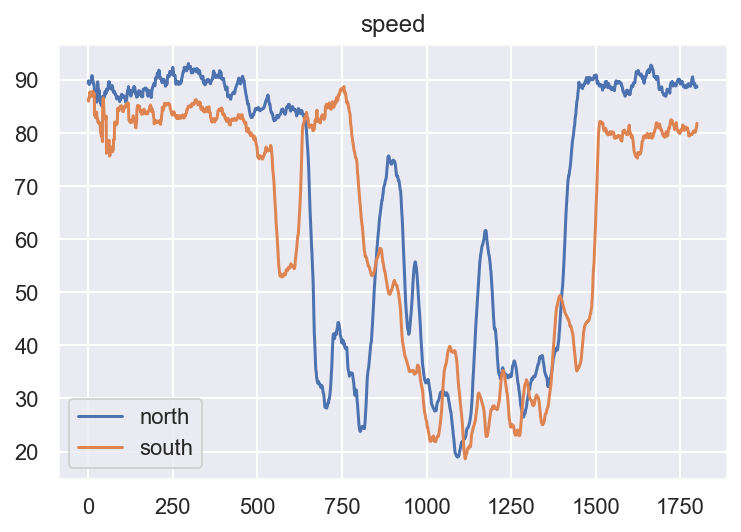

In [12]:
fig, ax = plt.subplots()
ax.plot(speed, label="north")
ax.plot(speed_s, label="south")
ax.set_title("speed")
ax.legend();

**Comparing D004 (North) and D107 (South) 10 seconds aggregated Flow**

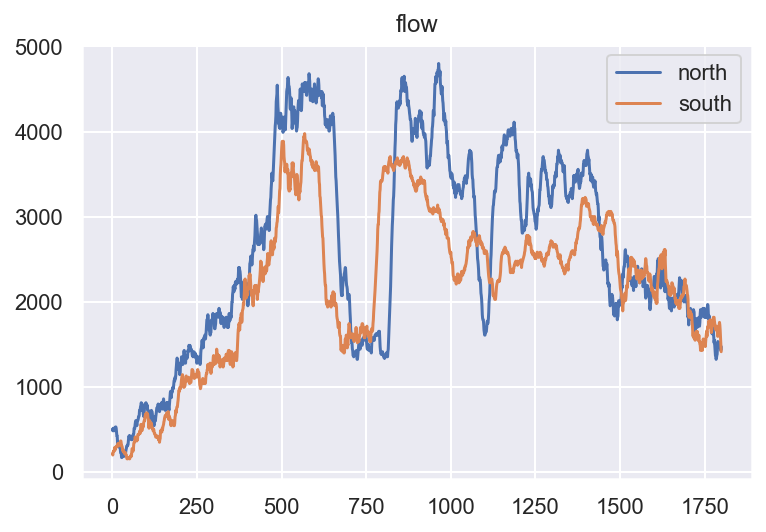

In [13]:
fig, ax = plt.subplots()
ax.plot(flow, label="north")
ax.plot(flow_s, label="south")
ax.set_title("flow")
ax.legend();

# Model

## Variables(code/equation)

Variables used in the model:

- `kjam` / $k^{jam}$ : Jam density


- `vf` / $f$ : Free flow speed


- `w` / $w$ : shockwave speed


- `k` / $k$ : density of a cell at time interval t


- `oldk` / $k^{old}$ : density of cell at time interval t - 1


- `length` / $\Delta_i$ : Length of a cell, unit is kilometer


- `time_sec` / $t$ : Time interval of simulation in second


- `time_hour`: Time interval of simulation in hour


- `cfrom` / $i-1$ : a list of upstream cells, objects of Cell class are saved in the list


- `cto` / $i+1$ : A list of downstream cells, objects of Cell class are saved in the list

-  `pk` (`pfpc`) / $p$ : proportion of density used in normal, diverging, and merging cells  


- `updated`: Flag bit of a cell that represents whether density of the cell has been updated


- `arr_rate`/ $q^{int}$ : arrival rate of traffic flow, will be used as inflow when there is no cell upstream


- `dis_rate` / $q^{last}$: discharge rate of traffic flow, will be used as outflow when there is no cell downstream

## Equations
Main equations used in the model: 

**S & R**

`sbk`& `sck` = `cp_s`:

$$ S_{i} = \min \left[q^{\max}_i, f_i k^{old}) \frac {T}{\Delta_i} \right]$$

`rek` & `rck`  = `cp_r`: 

$$ R_{i} = \min \left[q^{\max}_i, w_i (k^{jam}_{i} - k^{old}) \frac {T}{\Delta_i} \right]$$

**Outflow**

`cp_outflow`:

Computing outflow for normal cell is considering the minimum of maximum flow at the cell, previous density of the cell multiplied free flow speed, or Shockwave of the next cell that multiplied to value that subtracted from the kjam of the next cell and density of old cell at the next cell, then apply considered minimum value to time_hour divided by length of it cell.

$$ \text{outflow}_i = \min \left[ q^{max}_{i}, k^{old}_{i} f_i, w_{i+1} \left( k^{jam}_{i+1} - k^{old}_{i+1} \right) \right] \frac{T}{\Delta_i} $$



`cp_outflow_will_merge`:

Computing outflow for a cell or a ramp that will merge is considering the proportion of density cell behind that value multiplied to....

$$ \text{outflow}_{\text{i = previous}} = \min \left[ \text{median} \left[ p_{i+1} R_{i+1}, S_i, R_{i+1} - S_{\text{in-ramp}}\right], f_i k^{old}_i \frac{T}{\Delta_i} \right ] $$

$$ \text{outflow}_{\text{i = in-ramp}} = \min \left[ \text{median} \left[ p_{i+1} R_{i+1}, S_i, R_{i+1} - S_{\text{previous}}\right], f_i k^{old}_i \frac{T}{\Delta_i} \right ] $$

`cp_outflow_will_diverge`:

Computing outflow for a cell that will connected to diverging cell, is considering the minimum of ....

$$ \text{outflow}_i = \min \left[ S_i, \frac{R_{\text{off-ramp}}}{(1 - p_{i})}, \frac{R_{\text{following}}}{p_{i}} \right] $$

    

`cp_outflow_no_cto`:
Computing outflow for a cell that is not connecting in its downstream, which considers minimum of si.....

$$ \min \left[ q^{\max}_i, k^{old}_i f_i,  q^{last} \frac{T}{\Delta} \right] $$

**Inflow**

`cp_inflow`:

$$ \text{inflow}_i = \min \left[ q^{max}_{i}, f_i k^{old}_{i-1}, w_i \left( k^{jam}_i - k^{old}_i \right) \right] \frac{T}{\Delta_i} $$


`cp_inflow_merging`:
    
$$ \text{inflow}_i = \min\left[q^{max}_{i} \frac{T}{\Delta_i}, S_{\text{previous}}+S_\text{in-ramp}, w_i ( k^{jam}_i - k^{old}_i) \frac{T}{\Delta_i} \right] $$

`cp_inflow_next_c`:

$$ \text{inflow}_{\text{following}} = p_{i-1} \min\left[S_{i-1}, \frac{R_{\text{off-ramp}}}{(1 - p_{i-1})}, \frac{R_{\text{following}}}{p_{i-1}} \right]$$


`cp_inflow_diverge`:

$$ \text{inflow}_{\text{in-ramp}} = (1 - p_{i-1}) \min\left[S_{i-1}, \frac{R_{\text{off-ramp}}}{(1 - p_{i-1})}, \frac{R_{\text{following}}}{p_{i-1}} \right]$$

`cp_inflow_no_cfrom`:

$$ \text{inflow}_i = \min \left[ q^{max}_{i}, q^{\text{int}},  w_i \left( k^{jam}_i - k^{old}_i \right)  \frac{T}{\Delta_i} \right] $$

**Density**

cp_density 

$$ k_i = k^{old}_i  + \text{inflow}_i - \text{outflow}_i $$

## defined functions for CTM

In [14]:
# outflow
def cp_outflow(c):
    v = np.min([c.cto[0].qmax, c.oldk * c.vf, c.cto[0].w * (c.cto[0].kjam - c.cto[0].oldk)]) * c.time_hour / c.length
    return np.max([0., v])

def cp_outflow_will_merge(pfpc, c, rek, s, s_other):
    v = np.min([np.median([pfpc * rek, s, rek - s_other]), 
                c.vf * c.oldk * c.time_hour / c.length])
    return np.max([0., v])


def cp_outflow_will_diverge(ptnc, sbk, rek, rck):
    v = np.min([sbk, rek/(1-ptnc), rck/ptnc])
    return np.max([0., v])

def cp_outflow_no_cto(c):
    v = np.min([c.qmax, c.oldk * c.vf, c.dis_rate]) * c.time_hour / c.length
    return np.max([0., v])

# inflow
def cp_inflow(c):
    v = np.min([c.qmax, c.vf * c.cfrom[0].oldk, c.w * (c.kjam - c.oldk)]) * c.time_hour / c.length
    return np.max([0., v])

def cp_inflow_merging(c, sbk, sck):
    v = np.min([c.qmax * c.time_hour / c.length, sbk+sck, c.w * (c.kjam - c.oldk) * c.time_hour / c.length])
    return np.max([0., v])

def cp_inflow_next_c(ptnc, sbk, rek, rck):
    v = ptnc * np.min([sbk, rek/(1-ptnc), rck/ptnc])
    return np.max([0., v])

def cp_inflow_diverge(ptnc, sbk, rek, rck):
    v = (1-ptnc) * np.min([sbk, rek/(1-ptnc), rck/ptnc])
    return np.max([0., v])

def cp_inflow_no_cfrom(c):
    v = np.min([c.qmax, c.arr_rate, c.w * (c.kjam - c.oldk)]) * c.time_hour / c.length
    return np.max([0., v])

# s & r
def cp_s(c):
    v = np.min([c.qmax, c.vf * c.oldk]) * c.time_hour / c.length
    return np.max([0., v])

def cp_r(c):
    v = np.min([c.qmax, c.w * (c.kjam - c.oldk)]) * c.time_hour / c.length
    return np.max([0., v])

# density
def cp_density(c):
    v = c.oldk + np.max([0, c.inflow]) - np.max([0, c.outflow])
    return np.max([0., v])

In [15]:
class Cell(object):
    idcase = {}                               
    def __init__(self, cellid, time_interval, k, qmax, kjam, vf, w, length, pk=None,
                 arr_rate=None, dis_rate=None, linkid='L', zoneid='Z'):
        self.kjam = kjam
        self.cellid = cellid # local address
        self.linkid = linkid # link layer address
        self.zoneid = zoneid # zone layer address
        self.vf = vf # free flow speed
        self.w = w # backwave speed
        self.cfrom = [] # connection from (upstream)
        self.cto = [] # connection to (downstream)
        self.k = k # density at time interval t
        self.oldk = k # density at time interval t-1
        self.qmax = qmax
        self.length = length
        self.arr_rate = arr_rate # arrival rate
        self.dis_rate = dis_rate # discharge rate
        self.time_sec = time_interval
        self.time_hour = time_interval / 3600
        self.inflow = 0
        self.outflow = 0
        self.pk = pk # density propotion going to next cell (0...1)
        
        self.updated = False
        
        if Cell.idcase.get(self.getCompleteAddress()) == None:
            Cell.idcase.setdefault(self.getCompleteAddress(), self)
        else:
            raise Exception("This id has been used by other cell")
        
    def addConnection(self, sink):
        if len(sink.cfrom) == 2 or len(self.cto) == 2:
            raise Exception("Cannot add more connection to cell %s and cell %s" % (self.getCompleteAddress(), sink.getCompleteAddress())) 
            
        if (len(self.cto) and len(sink.cfrom)) and (len(sink.cto) == 2 or len(self.cfrom) == 2):
            raise Exception("Invaild cell connection! A cell cannot connect to merge and diverge cell simultaneously")
            
        self.cto.append(sink) # An instance of cell class is stored, in order to use cto and cfrom as pointer.
        sink.cfrom.append(self)
        
    def deleteConnection(self, sink):
        if sink not in self.cto:
            raise Exception("Cell %s is not connected with cell %s" % (self.getCompleteAddress(), sink.getCompleteAddress()))
            
        self.cto.remove(sink)
        sink.cfrom.remove(self)
        
    def getCell(cid):
        return Cell.idcase[cid]
    
    def getFirstCell(linkid):
        newDict = {}
        for key in Cell.idcase:
            if Cell.idcase[key].linkid == linkid:
                newDict[key] = Cell.idcase[key]
                
        return newDict[min(newDict.keys())]
    
    def getLastCell(linkid):
        newDict = {}
        for key in Cell.idcase:
            if Cell.idcase[key].linkid == linkid:
                newDict[key] = Cell.idcase[key]
                
        return newDict[max(newDict.keys())]
    
    def deleteCell(cid):
        poped = Cell.idcase.pop(cid)
        for elem in poped.cto:
            poped.deleteConnection(elem)
        del poped
        
    def getCompleteAddress(self):
        return "%s.%s.%s" % (self.zoneid, self.linkid, self.cellid)
    
    def updateDensity(self): # This method can only be used by normal cell instance.
        
        if not self.updated:
            self.oldk = self.k
        
        if len(self.cfrom) == 2: # Merge at here, we need to update density among this cell and two other upstream cells.
            pfpc = self.pk         # Proportion From Previous (normal) Cell
            # pfmc = 1 - self.pk     # Proportion From Merging Cell
            for elem in self.cfrom:
                rek = cp_r(c=self)                                    # np.min([self.qmax, self.w * (self.kjam - self.oldk)]) * self.time_hour / self.length
                if elem.linkid == self.linkid:
                    sbk = cp_s(c=elem)                                     # np.min([elem.qmax, elem.vf * elem.oldk]) * elem.time_hour / elem.length
                    prov = elem
                    
                else:
                    sck = cp_s(c=elem)                                     # np.min([elem.qmax, elem.vf * elem.oldk]) * elem.time_hour / elem.length
                    if not elem.updated:
                        elem.oldk = elem.k
                        
                    merge = elem
            
            if len(prov.cfrom):    
                prov.inflow = cp_inflow(c=prov)                                        # np.min([prov.qmax, prov.vf * prov.cfrom[0].oldk, prov.w * (prov.kjam - prov.oldk)]) * prov.time_hour / prov.length
                prov.outflow = cp_outflow_will_merge(c=prov, pfpc=pfpc, rek=rek, s=sbk, s_other=sck)    # np.min([np.median([pk * rek, sbk, rek - sck]), prov.vf * prov.oldk * prov.time_hour / prov.length])
            else:
                prov.inflow = cp_inflow_no_cfrom(c=prov)                               # np.min([prov.qmax, prov.arr_rate, prov.w * (prov.kjam - prov.oldk)]) * prov.time_hour / prov.length
                prov.outflow = cp_outflow_will_merge(c=prov, pfpc=pfpc, rek=rek, s=sbk, s_other=sck)    # np.min([np.median([pk * rek, sbk, rek - sck]), prov.vf * prov.oldk * prov.time_hour / prov.length])
                    
            if len(merge.cfrom): # if there are connections from,                
                merge.inflow = cp_inflow(c=merge)                                      # np.min([merge.qmax, merge.vf * merge.cfrom[0].oldk, merge.w * (merge.kjam - merge.oldk)]) * merge.time_hour / merge.length
                merge.outflow = cp_outflow_will_merge(c=merge, pfpc=pfpc, rek=rek, s=sck, s_other=sbk)  # merge.outflow = np.min([np.median([pck * rek, sck, rek - sbk]), merge.vf * merge.oldk * merge.time_hour / merge.length])
            else:
                merge.inflow = cp_inflow_no_cfrom(c=merge)                             # np.min([merge.qmax, merge.arr_rate, merge.w * (merge.kjam - merge.oldk)]) * merge.time_hour / merge.length
                merge.outflow = cp_outflow_will_merge(c=merge, pfpc=pfpc, rek=rek, s=sck, s_other=sbk)  # np.min([np.median([pck * rek, sck, rek - sbk]), merge.vf * merge.oldk * merge.time_hour / merge.length])
                
            if len(self.cto):   # if there are connections to,                
                self.inflow = cp_inflow_merging(c=self, sbk=sbk, sck=sck)                  # np.min([self.qmax * self.time_hour / self.length, sbk+sck, self.w * (self.kjam - self.oldk) * self.time_hour / self.length])
                self.outflow = cp_outflow(c=self)                                  # np.min([self.cto[0].qmax, self.oldk * self.vf, self.cto[0].w * (self.cto[0].kjam - self.cto[0].oldk)]) * self.time_hour / self.length
            else:
                self.inflow = cp_inflow_merging(c=self, sbk=sbk, sck=sck)                  # np.min([self.qmax * self.time_hour / self.length, sbk+sck, self.w * (self.kjam - self.oldk) * self.time_hour / self.length])
                self.outflow = cp_outflow_no_cto(c)                                    # np.min([self.qmax, self.oldk * self.vf, self.dis_rate]) * self.time_hour / self.length
            
            prov.k = cp_density(c=prov)                                                # prov.oldk + np.max([0, prov.inflow]) - np.max([0, prov.outflow])
            merge.k = cp_density(c=merge)                                              # merge.oldk + np.max([0, merge.inflow]) - np.max([0, merge.outflow])
            self.k = cp_density(c=self)                                                # self.oldk + np.max([0, self.inflow]) - np.max([0, self.outflow])
            
            prov.updated, self.updated, merge.updated = True, True, True
            
        elif len(self.cto) == 2: # Diverge at here
            ptnc = self.pk       # Propotion Towards Next (normal) Cell
            # ptdc = 1 - self.pk   # Propotion Towards Diverging Cell
            for elem in self.cto:
                if elem.linkid == self.linkid:
                    elem.oldk = elem.k
                    next_c = elem
                
                else:
                    if not elem.updated:
                        elem.oldk = elem.k
                        
                    diverge = elem
            
            rck = cp_r(c=next_c)                                                                 # np.min([next_c.qmax, next_c.w * (next_c.kjam - next_c.oldk)]) * next_c.time_hour / next_c.length # Receive ability of next normal cell
            rek = cp_r(c=diverge)                                                                # np.min([diverge.qmax, diverge.w * (diverge.kjam - diverge.oldk)]) * diverge.time_hour / diverge.length
            sbk = cp_s(c=self)                                                                   # np.min([self.qmax, self.vf * self.oldk]) * self.time_hour / self.length
            
            if len(next_c.cto): 
                next_c.inflow = cp_inflow_next_c(ptnc=ptnc, sbk=sbk, rek=rek, rck=rck)  # ptnc * np.min([sbk, rek/ptdc, rck/ptnc])
                next_c.outflow = cp_outflow(c=next_c)                                              # np.min([next_c.cto[0].qmax, next_c.vf * next_c.oldk, next_c.cto[0].w * (next_c.cto[0].kjam - next_c.cto[0].oldk)]) * next_c.time_hour / next_c.length
            else:
                next_c.inflow = cp_inflow_next_c(ptnc=ptnc, sbk=sbk, rek=rek, rck=rck)   # ptnc * np.min([sbk, rek/ptdc, rck/ptnc])
                next_c.outflow = cp_outflow_no_cto(c=next_c)                                        # np.min([next_c.qmax, next_c.vf * next_c.oldk, next_c.dis_rate]) * next_c.time_hour / next_c.length
            
            if len(diverge.cto):
                diverge.inflow = cp_inflow_diverge(ptnc=ptnc, sbk=sbk, rek=rek, rck=rck)  # ptdc * np.min([sbk, rek/ptdc, rck/ptnc])
                diverge.outflow = cp_outflow(c=diverge)                                 # np.min([diverge.cto[0].qmax, diverge.oldk * diverge.vf, diverge.cto[0].w * (diverge.cto[0].kjam - diverge.cto[0].oldk)]) * diverge.time_hour / diverge.length
            else:
                diverge.inflow = cp_inflow_diverge(ptnc=ptnc, sbk=sbk, rek=rek, rck=rck)  # ptdc * np.min([sbk, rek/ptdc, rck/ptnc])
                diverge.outflow = cp_outflow_no_cto(c=diverge)                              # np.min([diverge.qmax, diverge.oldk * diverge.vf, diverge.dis_rate]) * diverge.time_hour / diverge.length
            
            if len(self.cfrom):
                self.inflow = cp_inflow(c=self)                                             # np.min([self.qmax, self.cfrom[0].oldk * self.vf, self.w * (self.kjam - self.oldk)]) * self.time_hour / self.length
                self.outflow = cp_outflow_will_diverge(ptnc=ptnc, sbk=sbk, rek=rek, rck=rck) # np.min([sbk, rek/ptdc, rck/ptnc])
            else:
                self.inflow =  cp_inflow_no_cfrom(c=self)        # np.min([self.qmax, self.arr_rate, self.w * (self.kjam - self.oldk)]) * self.time_hour / self.length
                self.outflow = cp_outflow_will_diverge(ptnc=ptnc, sbk=sbk, rek=rek, ptdc=ptdc, rck=rck) # np.min([sbk, rek/ptdc, rck/ptnc])
            
            next_c.k = cp_density(c=next_c)                     # next_c.oldk + np.max([0, next_c.inflow]) - np.max([0, next_c.outflow])
            diverge.k = cp_density(c=diverge)                   # diverge.oldk + np.max([0, diverge.inflow]) - np.max([0, diverge.outflow])
            self.k = cp_density(c=self)                         # self.oldk + np.max([0, self.inflow]) - np.max([0, self.outflow])
            next_c.updated, self.updated, diverge.updated = True, True, True
                    
        else: # Normal cell
            if self.updated:
                return
            
            if len(self.cfrom) == 0 and len(self.cto) == 0:
                self.inflow = cp_inflow_no_cfrom(c=self) 
                self.outflow = cp_outflow_no_cto(c=self)
                
            elif len(self.cfrom) == 0:
                self.inflow = cp_inflow_no_cfrom(c=self)        # np.min([self.qmax, self.arr_rate, self.w * (self.kjam - self.oldk)]) * self.time_hour / self.length
                self.outflow = cp_outflow(c=self)               # np.min([self.cto[0].qmax, self.oldk * self.vf, self.cto[0].w * (self.cto[0].kjam - self.cto[0].oldk)]) * self.time_hour / self.length
                
            elif len(self.cto) == 0:
                self.inflow = cp_inflow(c=self)                 # np.min([self.qmax, self.cfrom[0].oldk * self.vf, self.w * (self.kjam - self.oldk)]) * self.time_hour / self.length                
                self.outflow = cp_outflow_no_cto(c=self)        # np.min([self.qmax, self.oldk * self.vf, self.dis_rate]) * self.time_hour / self.length
            
            else:
                self.inflow = cp_inflow(c=self)                  # np.min([self.qmax, self.cfrom[0].oldk * self.vf, self.w * (self.kjam - self.oldk)]) * self.time_hour / self.length
                self.outflow = cp_outflow(c=self)                # np.min([self.cto[0].qmax, self.oldk * self.vf, self.cto[0].w * (self.cto[0].kjam - self.cto[0].oldk)]) * self.time_hour / self.length
 
            self.k = cp_density(c=self)                          # self.oldk + np.max([0, self.inflow]) - np.max([0, self.outflow])            
            self.updated = True

# Try by hand with a single cell

We understand that conventional way of using the model needs to have at least two or three connected cells. But, we would like to see the how the code behave while simulating a single cell.There are few changes added on the initial parameters to obtain the result of model close to the actual density observed at the detector 004 (C0). In the first trial, to understand the behavior of model, we isolated the C0 from the lest of network and simulated with same parameter. After number of trials, setting maximum density (from detector 004 data) as jam density, free flow speed as (90 km/h), shock wave speed as minimum speed (from detector 004 data) multiplied 3, and discharge rate (from detector 107) multiply 1.8 shown interesting development.

In [16]:
np.max(density)

127.55707407982607

In [17]:
np.min(speed)*3

56.90769230769231

In [18]:
Cell.idcase = {}

time_interval = 10
kjam = np.max(density) # np.inf  # np.min(flow) / np.min(flow)
qmax = np.max(flow)
vf = np.max(speed)
w = np.min(speed)*3
dis_factor = 1.8

C0 = Cell(f'C0',
          time_interval=time_interval, k=0, 
          qmax=qmax, kjam=kjam,
          vf=vf, w=w, length=0.5)   

cells = [C0, ]

est_density = np.zeros(len(density))

for t in range(len(density)):

    C0.arr_rate = flow[t]
    C0.dis_rate =  dis_factor*flow_s[t]
    for c in cells:
        c.updateDensity()
    for i, c in enumerate(cells):
        c.updated = False
    est_density[t] = cells[0].k

In [19]:
np.min(flow) / np.min(speed)

8.69829683698297

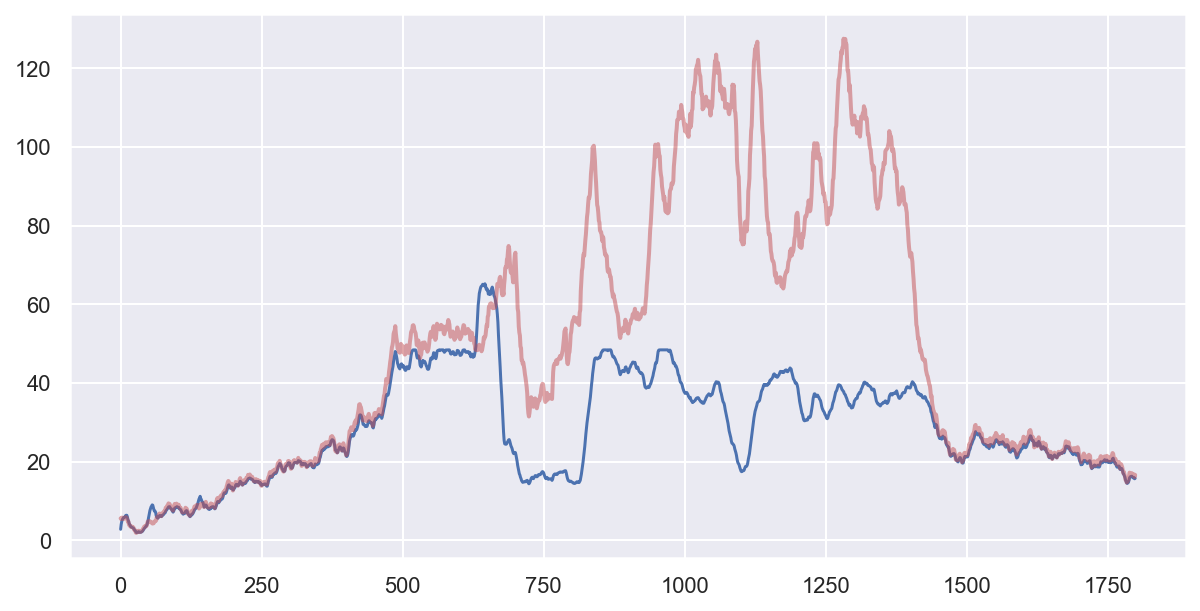

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(est_density[:])
ax.plot(density[:], alpha=0.5, color='C3', lw=2)

#ax.set_facecolor('white')
#ax.grid(False)

#ax2 = ax.twinx()
#ax2.set_facecolor('white')
#ax2.grid(False)

#ax2.plot(flow[:], alpha=1, color='C1', lw=0.4, ls=':')
#ax2.plot(flow_s[:], alpha=1, color='C1', lw=0.4, ls=':');

Density from actual data (red) and the result from simulation were slightly identical until 500 (around 6:23 am) and after 1500(around 9:16 am). Therefore, parameterization of C0 and functions of CTM seemed to be working. However, simulation could not obtain the realistic density during morning peak hours, especially between 1000(around 7:45 am) and 1500(around 9:16 am).

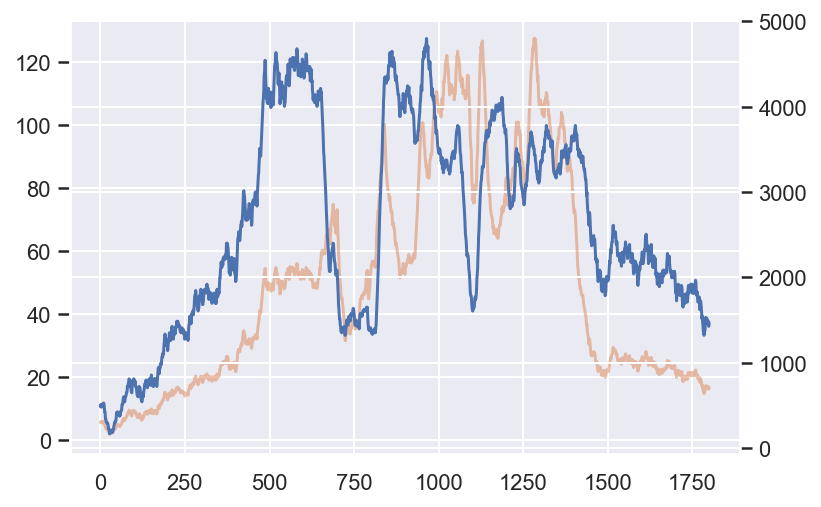

In [21]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(density, alpha=0.5, color='C1')
ax2.plot(flow)

# Construct the network

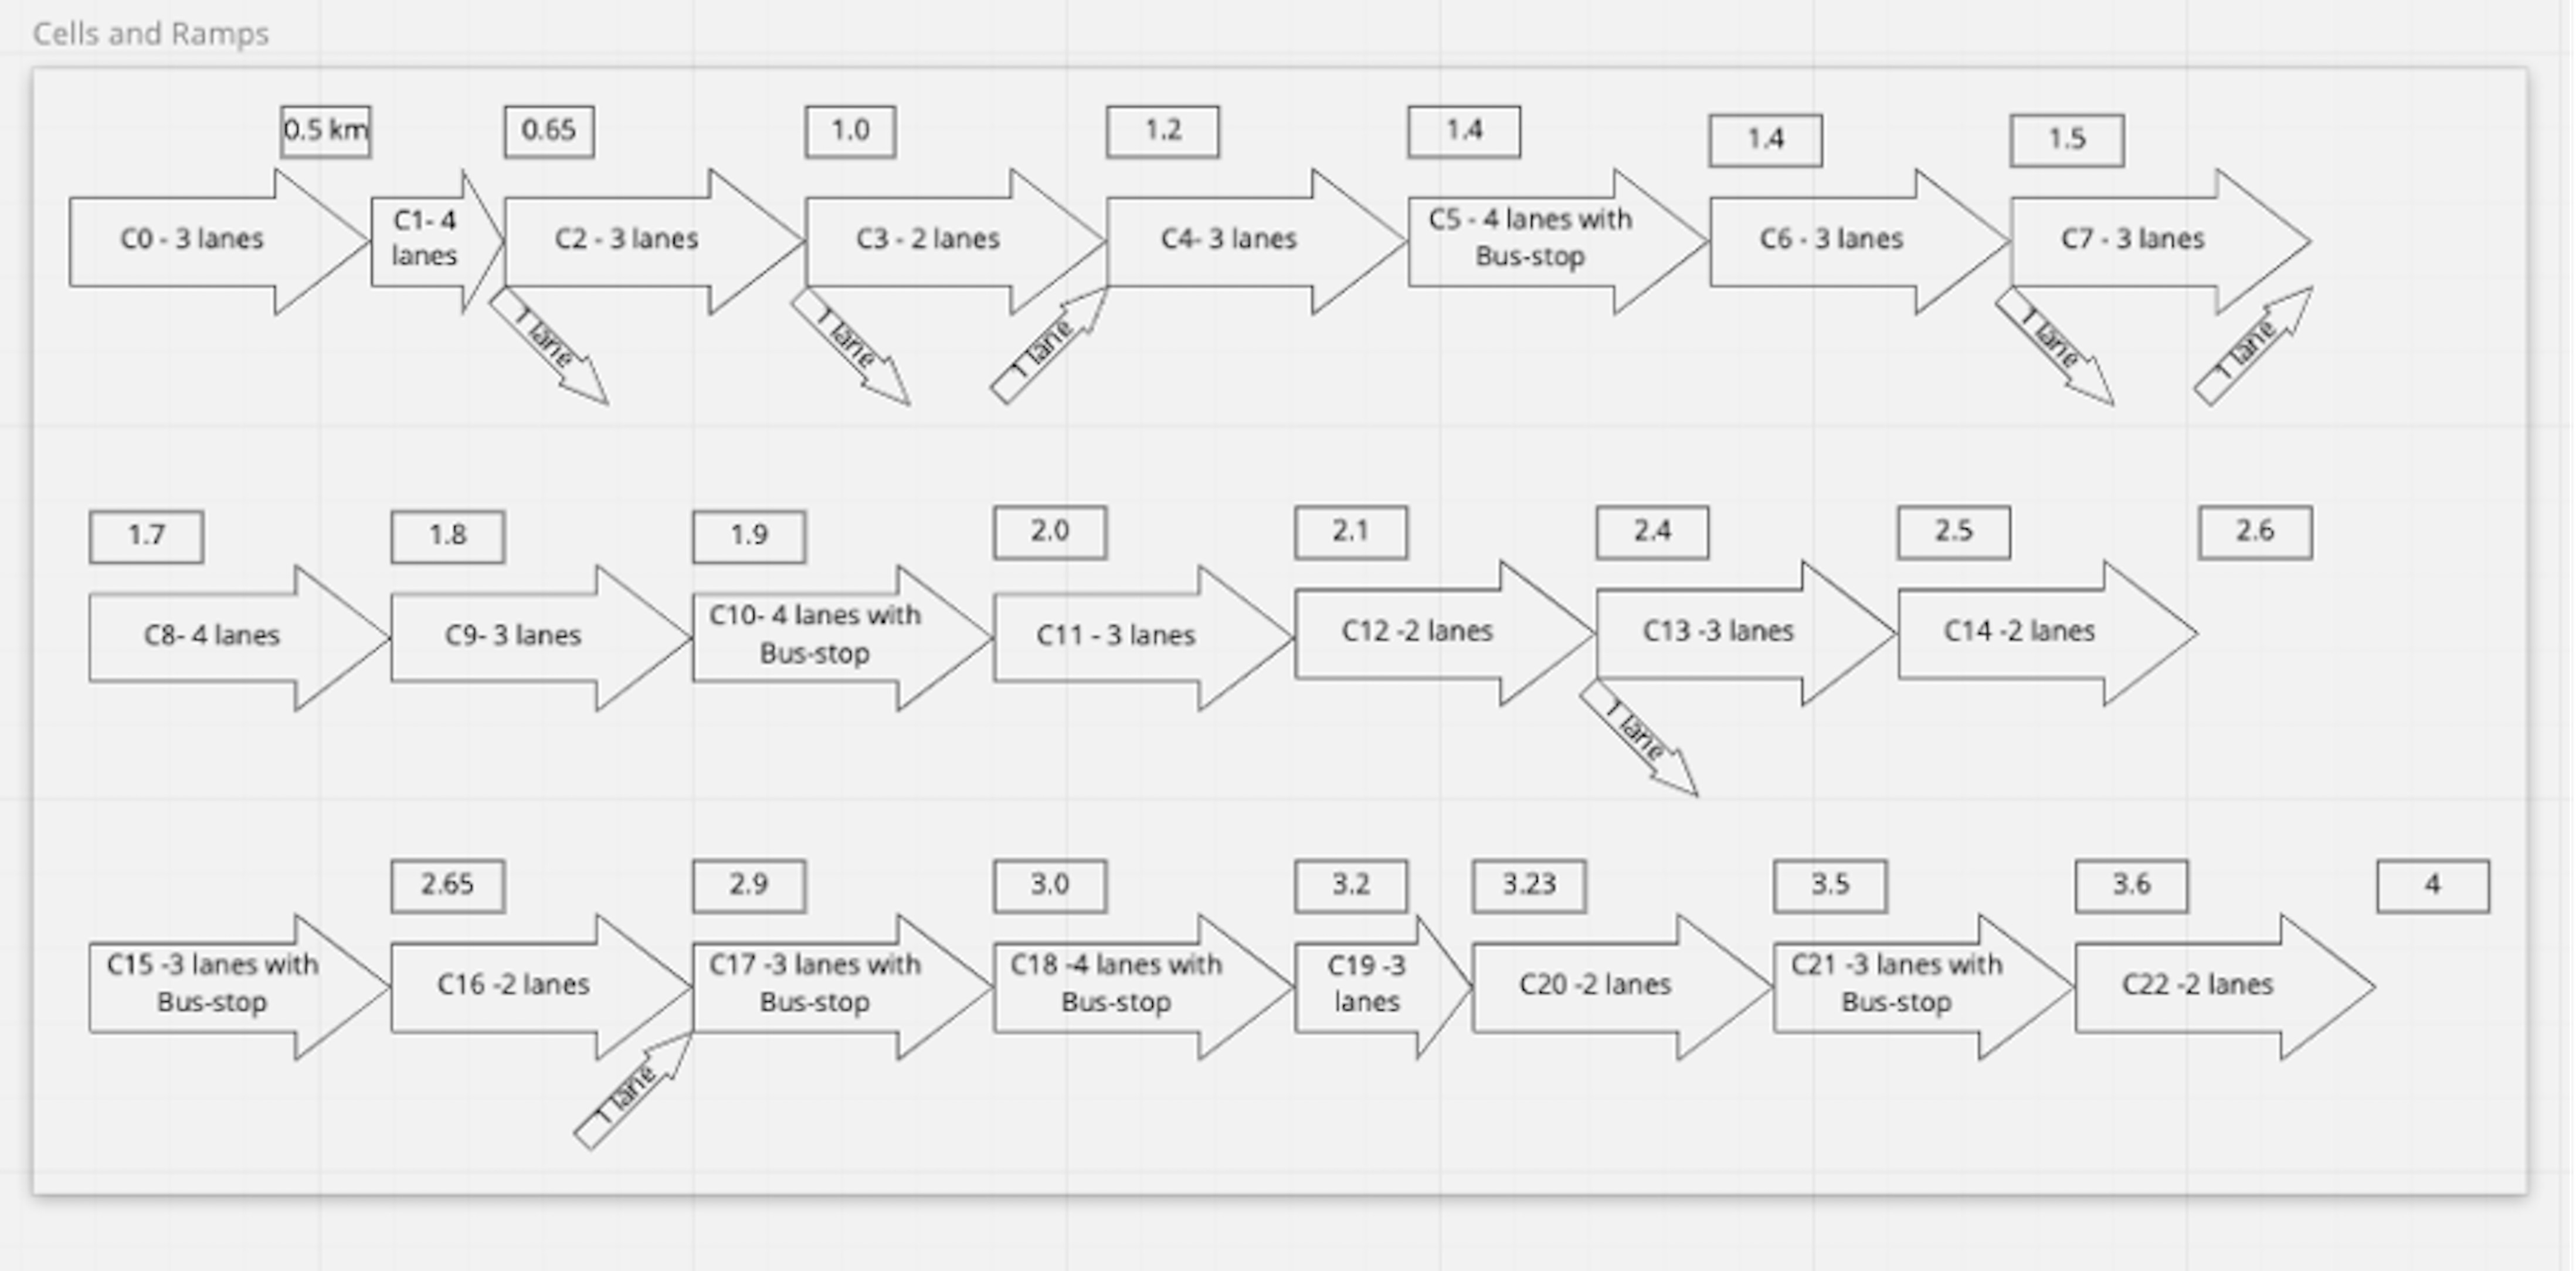

In [22]:
Image('CellsandRamps.jpg')

## Parameterization

In [23]:
np.min(speed)*3

56.90769230769231

In [24]:
time_interval = 10
kjam = np.max(density)
qmax = np.max(flow)
vf = np.max(speed)
w = np.min(speed)*3
# dis_rate = np.inf

dis_factor = np.inf
arr_factor = 0.01
arr_factor_merging = 0 #.001
dis_factor_diverging = np.inf # 0.2

qmax_first = qmax
kjam_first = kjam

length = np.array([0.5, 0.15, 0.35, 0.2, 0.2, 0.05, 0.05, 0.2, 0.1, 0.1, 0.1, 0.1, 
          0.3, 0.3, 0.1, 0.05, 0.05, 0.1, 0.2, 0.03, 0.27, 0.1, 0.4])

# prop_length = length/length[0]

n_lines = np.array([3, 4, 3, 2, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2])
prop_line = n_lines/n_lines[0]

qmax = qmax_first * np.ones(len(prop_line)) # prop_line
kjam = kjam_first * np.ones(len(prop_line))  # prop_line

# time_interval = 10
# vf = 90
# w = np.inf   # 12 

kjam_offramp = kjam_first
qmax_offramp = qmax_first
vf_offramp = 60
w_offramp = w

kjam_onramp = kjam_first
qmax_onramp = qmax_first
vf_onramp = 60
w_onramp = w

In [25]:
ramp_off = np.array([0.06, 0.05, 0.03, 0.03])
ramp_on = np.array([0.01, 0.01, 0.01])
# prop_missing = 1 - (8038/9863)
# -np.sum(ramp_off) + np.sum(ramp_on)

In [26]:
# Number of timesteps
endtime = 1750 # len(flow)
begin = 300

## Cells 

In [27]:
Cell.idcase = {}

C = []
for i in range(len(length)):
    c = Cell(f'C{i}',
              time_interval=time_interval, k=0, qmax=qmax[i], kjam=kjam[i],
              vf=vf, w=w, length=length[i])     
    C.append(c)
    
for index in range(len(C)-1):
    C[index].addConnection(C[index + 1])

## Ramps

In [28]:
# in(on)- and off-ramp

D = [
    Cell('D0', 
          time_interval=time_interval, k=0, qmax=qmax_offramp, kjam=kjam_offramp, 
          vf=vf_offramp, w=w_offramp, length=0.35,
          dis_rate=0,
          linkid='', zoneid=''),
    Cell('D1', 
          time_interval=time_interval, k=0, qmax=qmax_offramp, kjam=kjam_offramp, 
          vf=vf_offramp, w=w_offramp, length=0.28,
          dis_rate=0,
          linkid='', zoneid=''),
    Cell('D2', 
          time_interval=time_interval, k=0, qmax=qmax_offramp, kjam=kjam_offramp, 
          vf=vf_offramp, w=w_offramp, length=0.18,
          dis_rate=0,
          linkid='', zoneid=''),
    Cell('D3',
          time_interval=time_interval, k=0, qmax=qmax_offramp, kjam=kjam_offramp,
          vf=vf_offramp, w=w_offramp, length=0.23,
          dis_rate=0,
          linkid='', zoneid='')
]

#C[1].pk = 1-ramp_off[0]
#C[1].addConnection(D[0])

#C[2].pk = 1.-ramp_off[1]
#C[2].addConnection(D[1])

#C[6].pk = 1-ramp_off[2]
#C[6].addConnection(D[2])

#C[12].pk = 1-ramp_off[3]
#C[12].addConnection(D[3])
                
M = [
    Cell('M0',
          time_interval=time_interval, k=0, qmax=qmax_onramp, kjam=kjam_onramp, 
          vf=vf_onramp, w=w_onramp, length=0.14,
          arr_rate=0,
          linkid='', zoneid=''),
    Cell('M1',
              time_interval=time_interval, k=0, qmax=qmax_onramp, kjam=kjam_onramp,
              vf=vf_onramp, w=w_onramp, length=0.26, 
              arr_rate=0,
              linkid='', zoneid=''),
    Cell('M2',
          time_interval=time_interval, k=0, qmax=qmax_onramp, kjam=kjam_onramp,
          vf=vf_onramp, w=w_onramp, length=0.26,
          arr_rate=0,
          linkid='', zoneid='') 
]
    

#C[4].pk = 1-ramp_on[0]
#M[0].addConnection(C[4])

#C[8].pk = 1-ramp_on[1]
#M[1].addConnection(C[8])

#C[17].pk = 1-ramp_on[2]
#M[2].addConnection(C[17])

# Add to the list of cells
#C.extend(D)
#C.extend(M)

# Here simulation begins

In [30]:
# Create a dataframe for storing the results
dfindex = []
for c in C:
    dfindex.append(c.getCompleteAddress())
df = pd.DataFrame(index=dfindex)

# Run the simulation
for t in range(endtime-begin):
    
    est_density = np.zeros(len(C))
    
    C[0].arr_rate = arr_factor*flow[begin+t]
    C[22].dis_rate = np.inf # dis_factor*flow_s[begin+t]
    
#     for d in D:
#         d.dis_rate = flow_s[begin+t]*dis_factor_diverging
    
#     for m in M:
#         m.arr_rate = flow[begin+t]*arr_factor_merging
        
    for c in C:
        c.updateDensity()
        
    for i, c in enumerate(C):
        est_density[i] = c.k
        c.updated = False
    
    df[t] = est_density

In [31]:
df

,0,1,2,3,4,5,6,7,8,9,...,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449
Z.L.C0,0.100833,0.143694,0.162726,0.171917,0.178022,0.182637,0.189866,0.193357,0.196709,0.197495,...,0.196833,0.196721,0.199167,0.201182,0.202988,0.204694,0.201351,0.198903,0.201054,0.203760
Z.L.C1,0.000000,0.173796,0.121913,0.192259,0.157198,0.193091,0.175073,0.200570,0.188137,0.202912,...,0.198005,0.195985,0.197254,0.200552,0.201638,0.203965,0.205221,0.198550,0.199158,0.202426
Z.L.C2,0.000000,0.000000,0.128381,0.123603,0.174318,0.161672,0.184880,0.177636,0.194577,0.189820,...,0.198769,0.198205,0.196565,0.197074,0.199643,0.201117,0.203221,0.204698,0.200157,0.199419
Z.L.C3,0.000000,0.000000,0.000000,0.165958,0.111206,0.192791,0.152563,0.194340,0.172747,0.200967,...,0.198316,0.198901,0.198001,0.196145,0.197346,0.200315,0.201351,0.203768,0.204971,0.198748
Z.L.C4,0.000000,0.000000,0.000000,0.000000,0.214534,0.080962,0.225524,0.131207,0.212819,0.161017,...,0.185111,0.202182,0.197941,0.198019,0.195597,0.197858,0.201035,0.201444,0.204448,0.205123
Z.L.C5,0.000000,0.000000,0.000000,0.000000,0.000000,1.109310,0.000000,1.166137,0.000000,1.100443,...,0.000000,0.957169,0.000000,1.023515,0.000000,1.011391,0.000000,1.039510,0.000000,1.057162
Z.L.C6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.736021,0.000000,6.029860,0.000000,...,4.775795,0.000000,4.949331,0.000000,5.292390,0.000000,5.229701,0.000000,5.375096,0.000000
Z.L.C7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.414953,0.000000,7.794799,...,0.000000,6.173669,0.000000,6.397998,0.000000,6.841471,0.000000,6.760433,0.000000,6.948385
Z.L.C8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.170615,0.000000,...,16.459542,0.000000,15.961401,0.000000,16.541382,0.000000,17.687935,0.000000,17.478420,0.000000
Z.L.C9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.563697,...,0.000000,42.554490,0.000000,41.266597,13.545091,21.291700,0.000000,45.730377,0.000000,45.188697


# Plot

In [33]:
df_flip = df.T
df_flip

,Z.L.C0,Z.L.C1,Z.L.C2,Z.L.C3,Z.L.C4,Z.L.C5,Z.L.C6,Z.L.C7,Z.L.C8,Z.L.C9,...,Z.L.C13,Z.L.C14,Z.L.C15,Z.L.C16,Z.L.C17,Z.L.C18,Z.L.C19,Z.L.C20,Z.L.C21,Z.L.C22
0,0.100833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.143694,0.173796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.162726,0.121913,0.128381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.171917,0.192259,0.123603,0.165958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.178022,0.157198,0.174318,0.111206,0.214534,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,0.204694,0.203965,0.201117,0.200315,0.197858,1.011391,0.000000,6.841471,0.000000,21.291700,...,116.432510,133.333333,0.000000,266.666667,128.423326,57.391627,274.478776,93.715277,118.716630,13.473440
1446,0.201351,0.205221,0.203221,0.201351,0.201035,0.000000,5.229701,0.000000,17.687935,0.000000,...,77.849855,133.333333,266.666667,0.000000,102.038026,112.849317,0.000000,64.145921,0.000000,38.098217
1447,0.198903,0.198550,0.204698,0.203768,0.201444,1.039510,0.000000,6.760433,0.000000,45.730377,...,104.041736,0.000000,266.666667,266.666667,0.000000,124.474102,444.444444,58.970105,133.333333,13.473440
1448,0.201054,0.199158,0.200157,0.204971,0.204448,0.000000,5.375096,0.000000,17.478420,0.000000,...,116.432510,133.333333,0.000000,185.987214,133.333333,57.807435,110.316444,49.743008,0.000000,38.098217


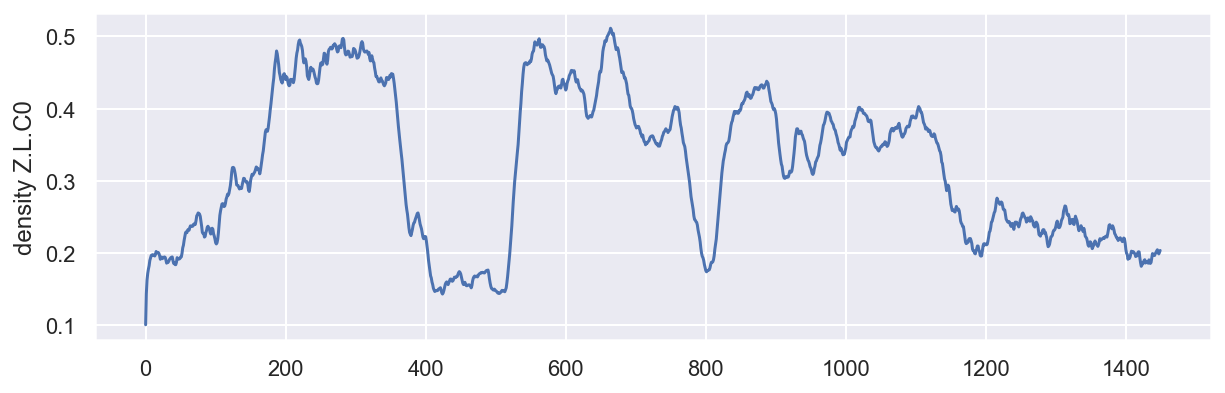

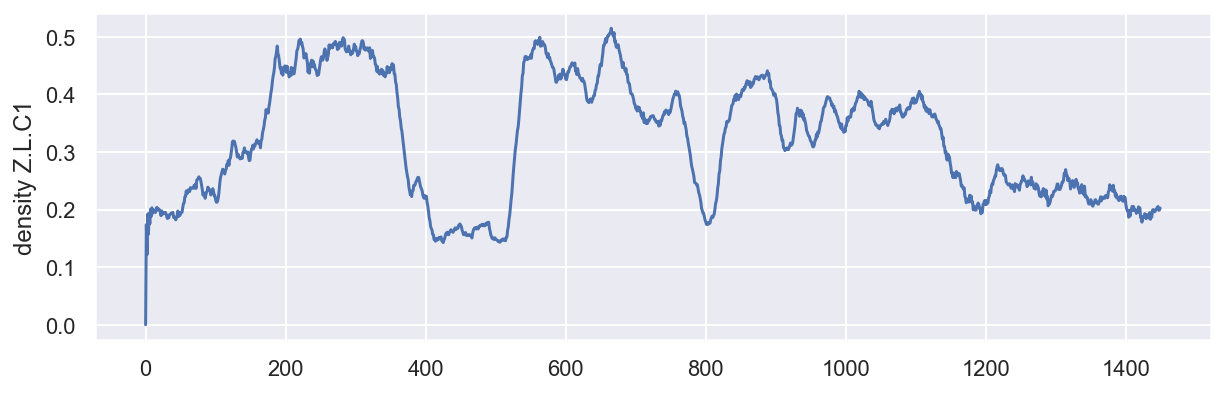

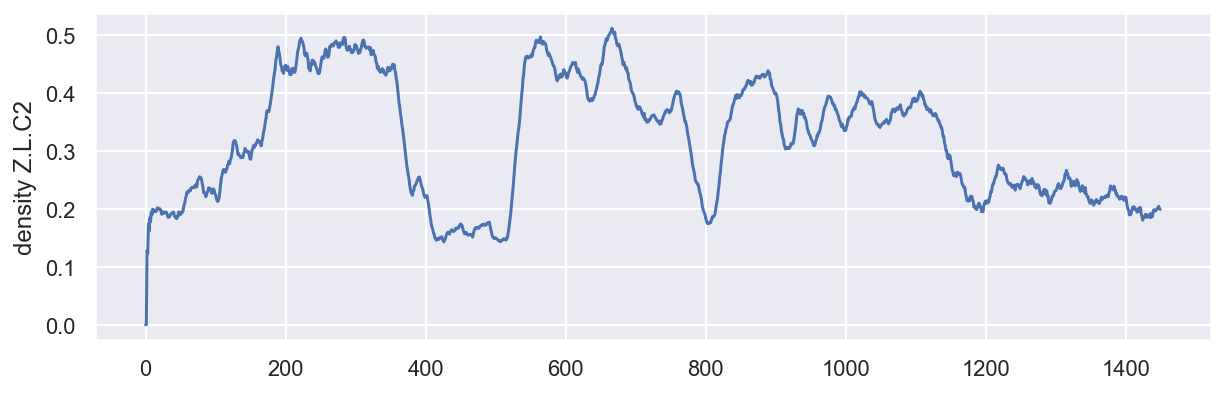

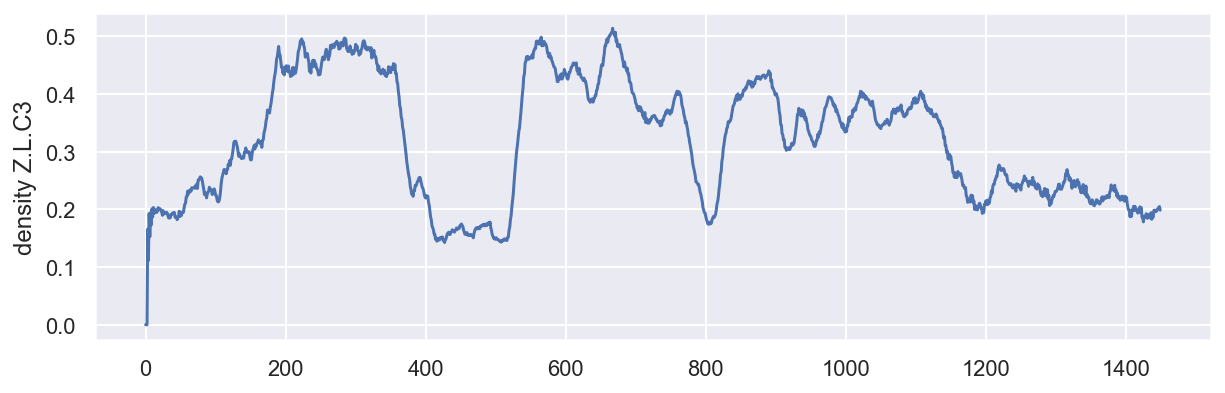

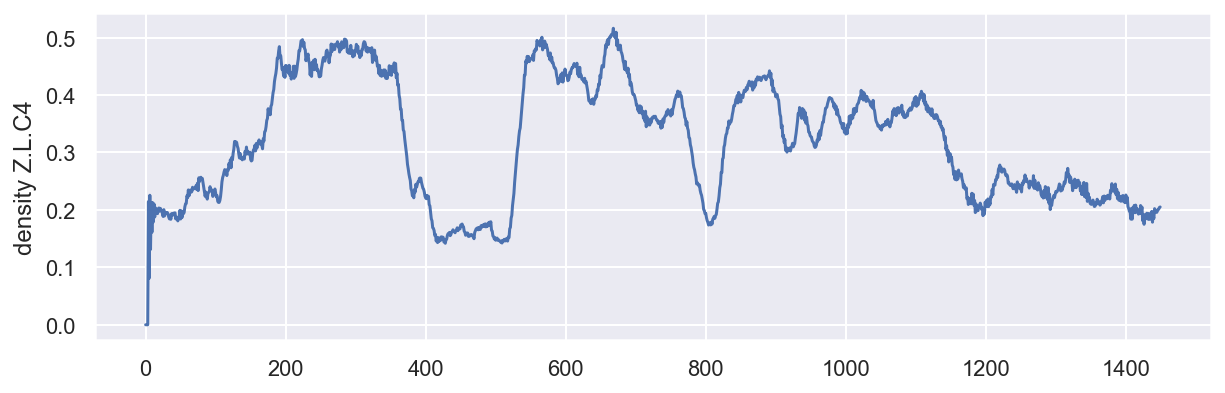

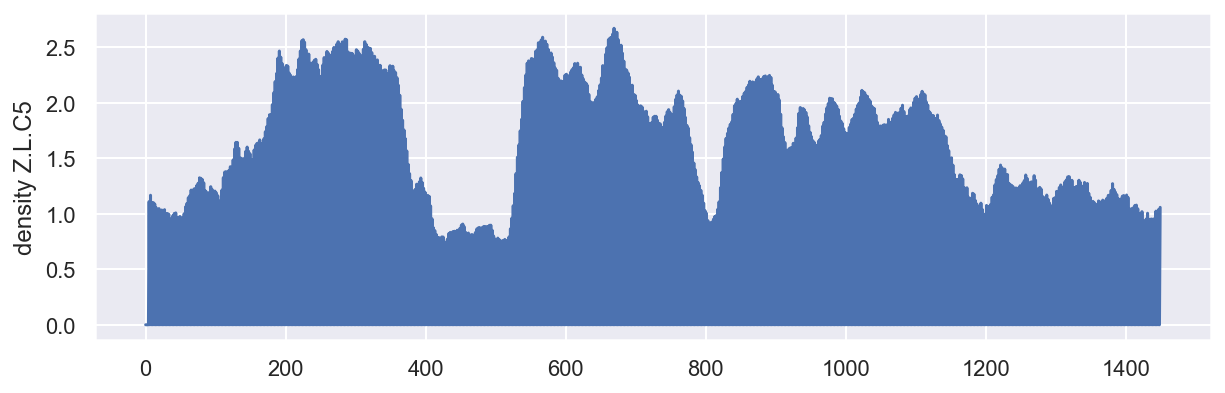

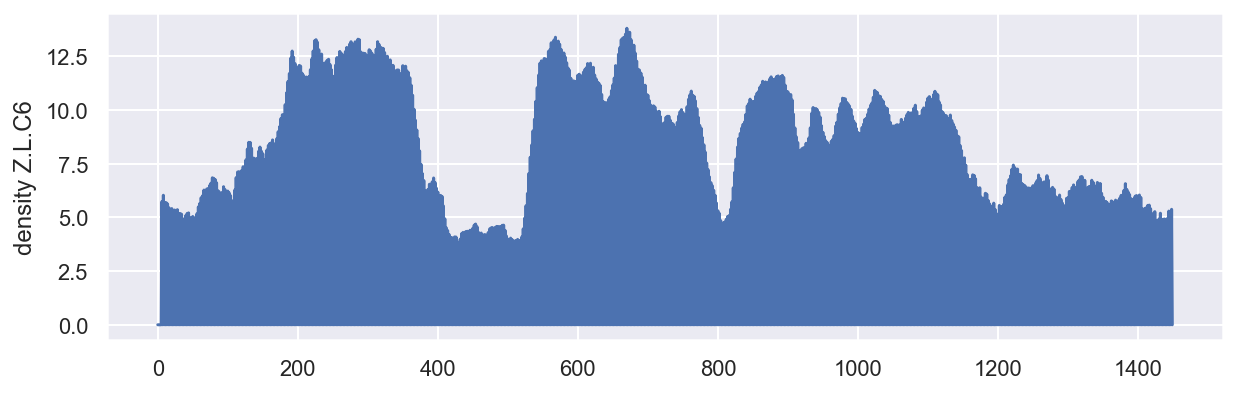

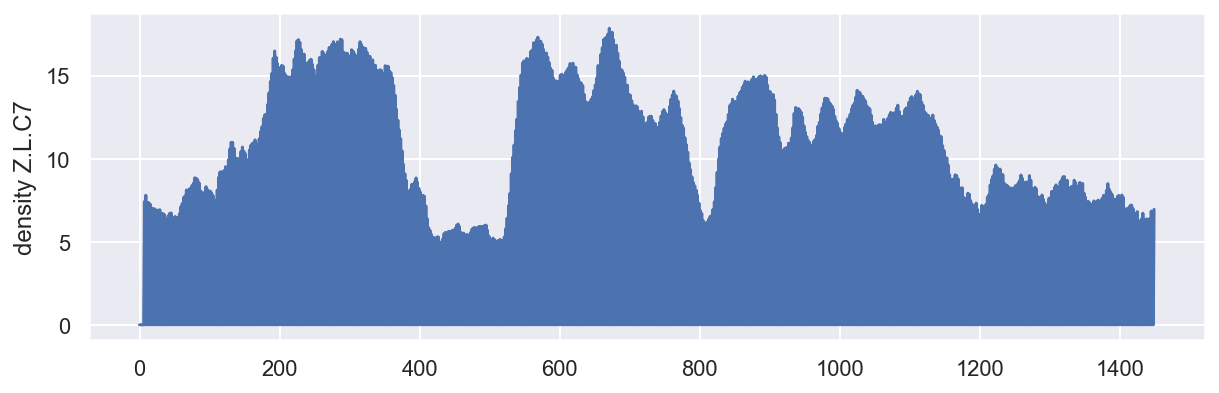

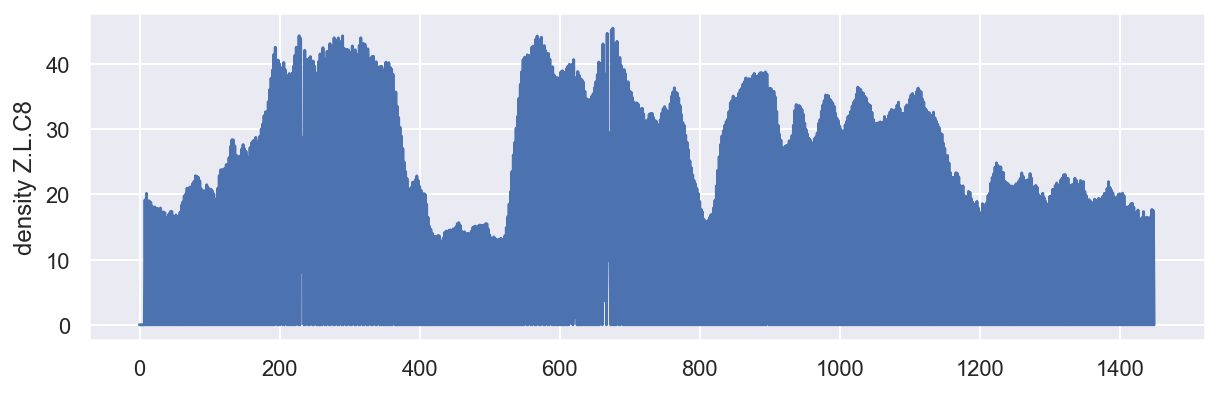

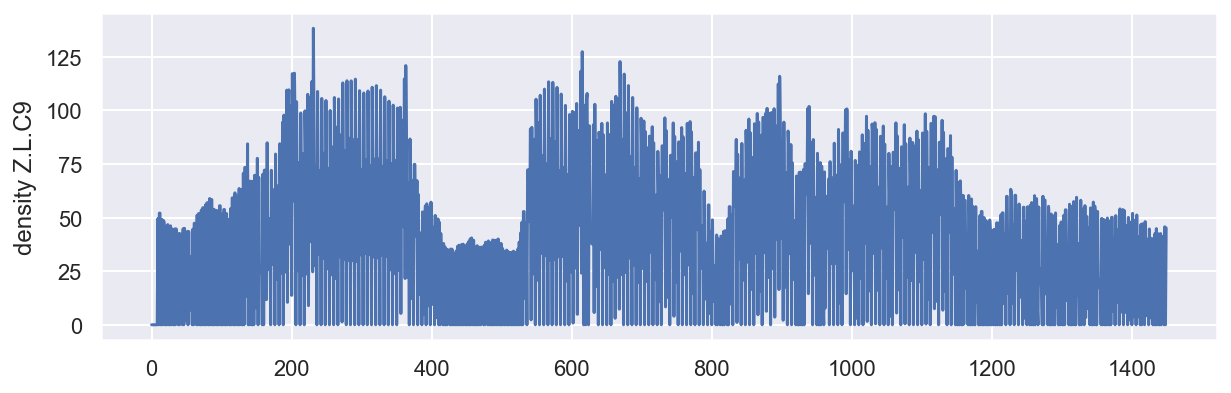

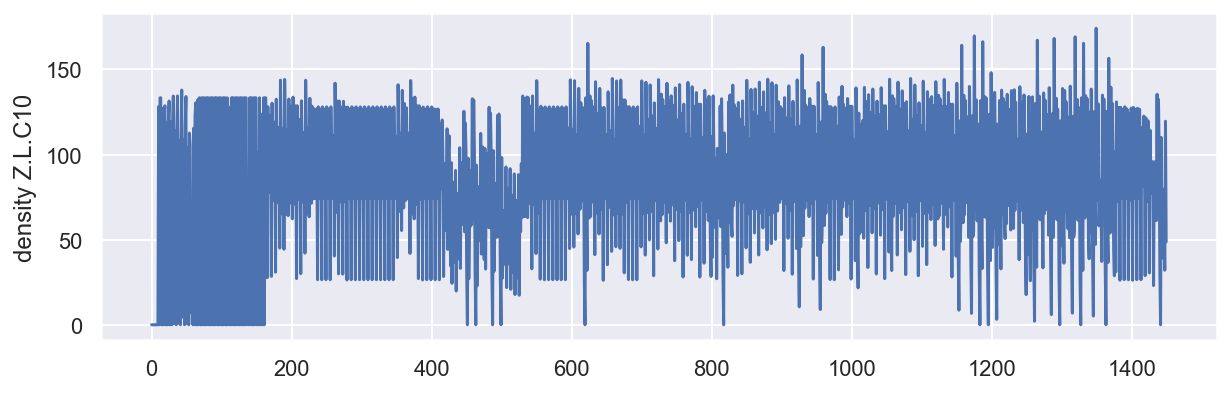

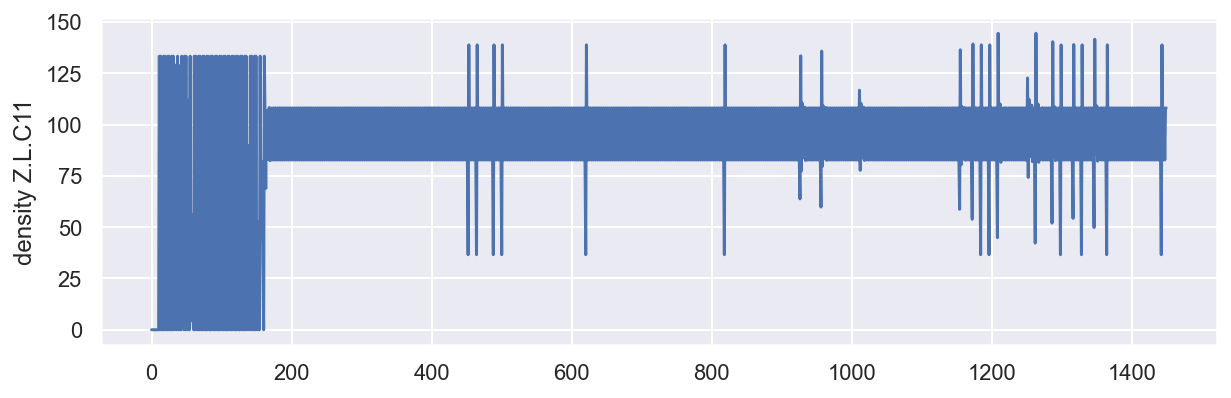

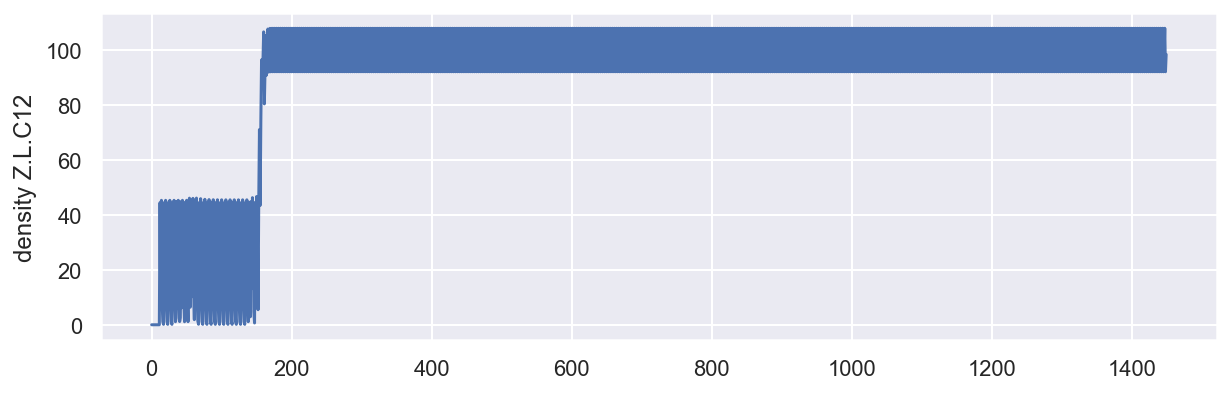

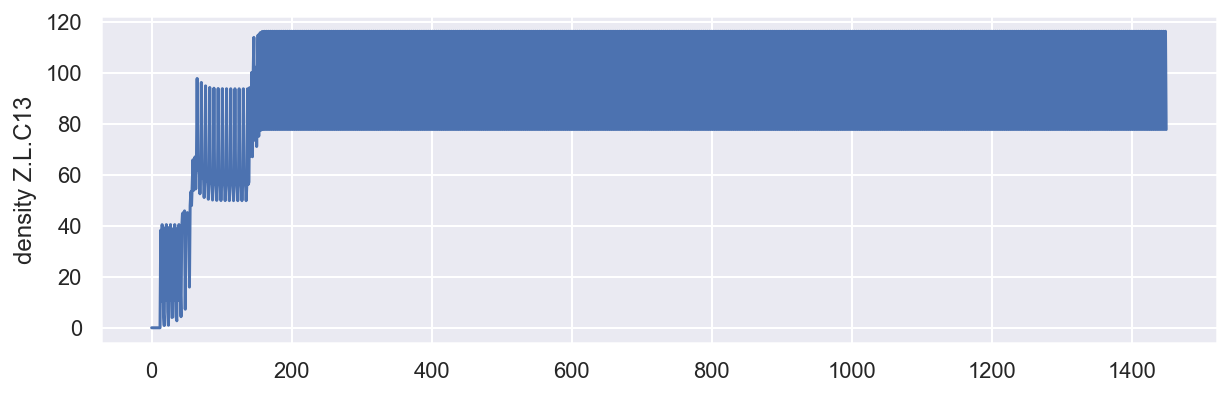

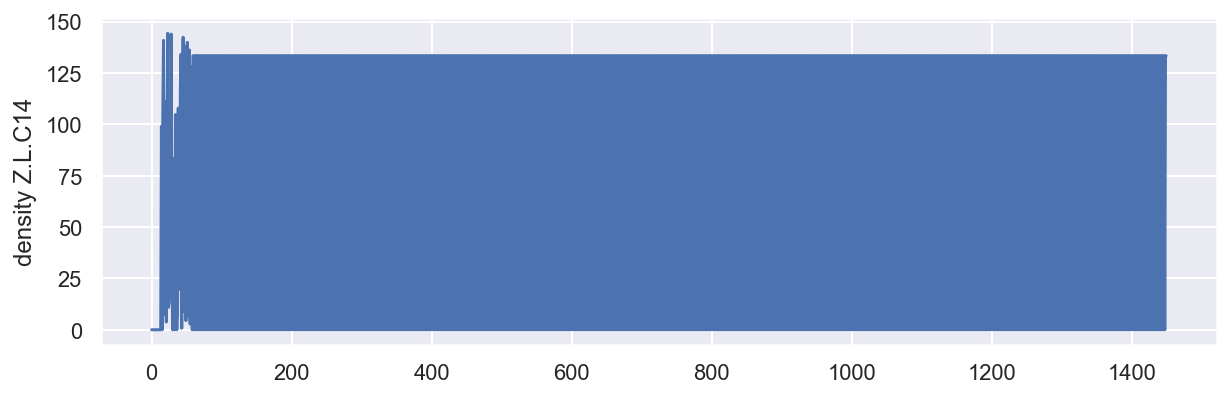

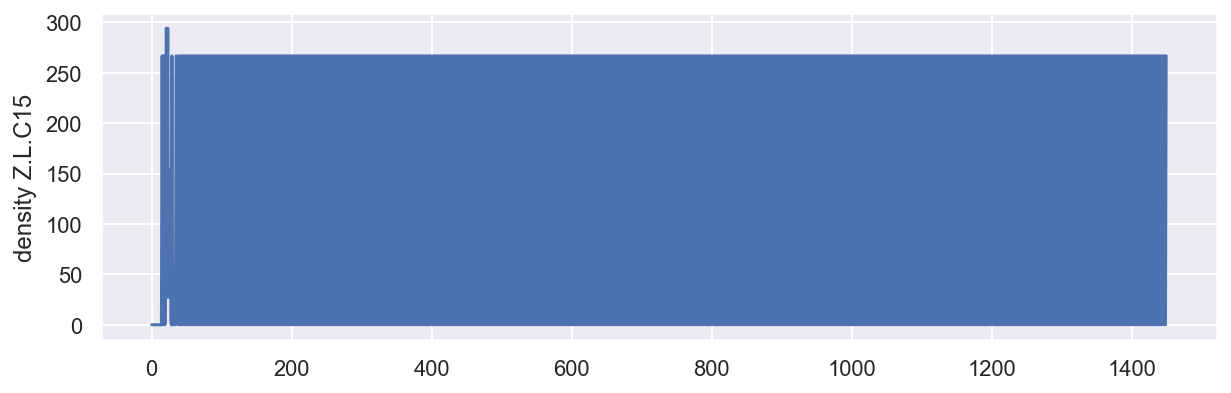

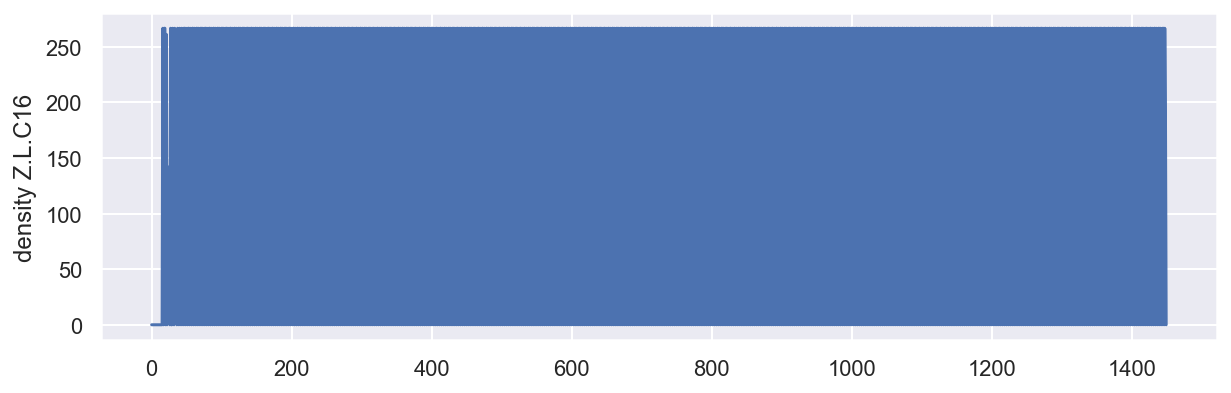

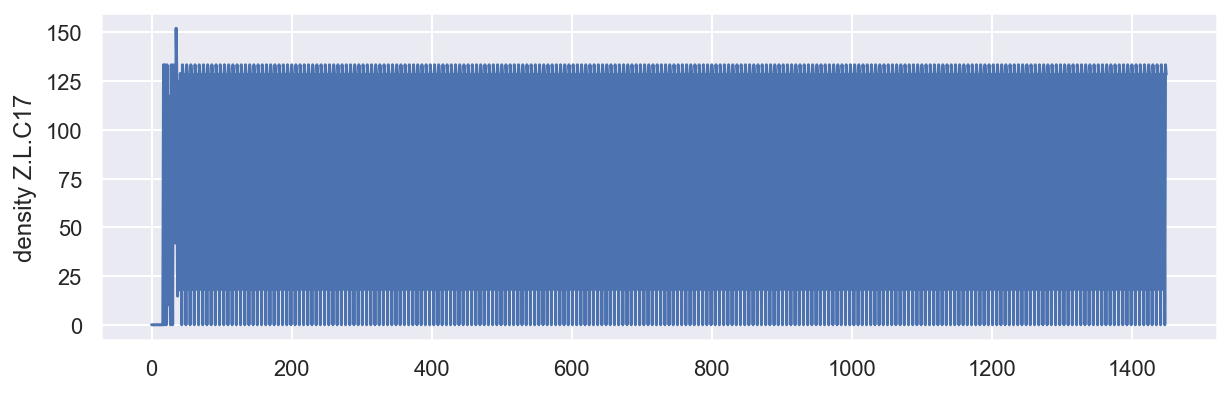

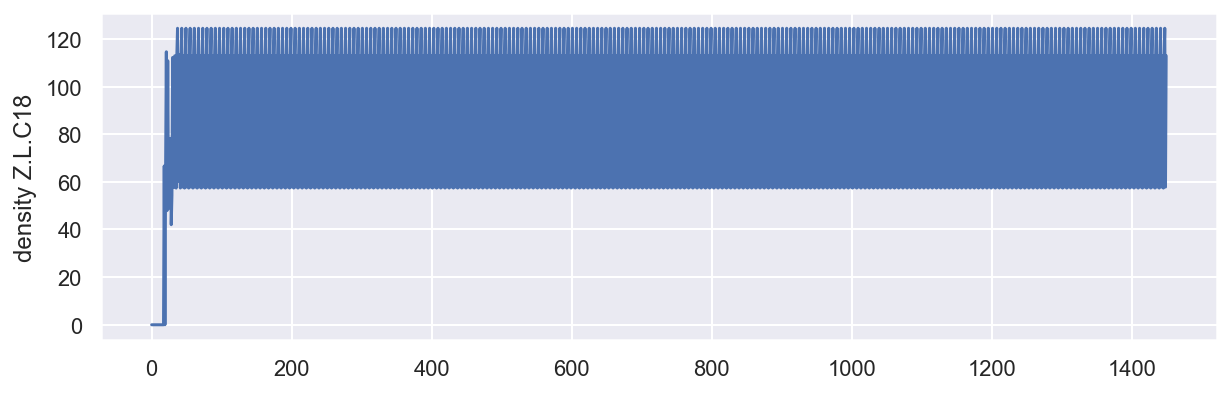

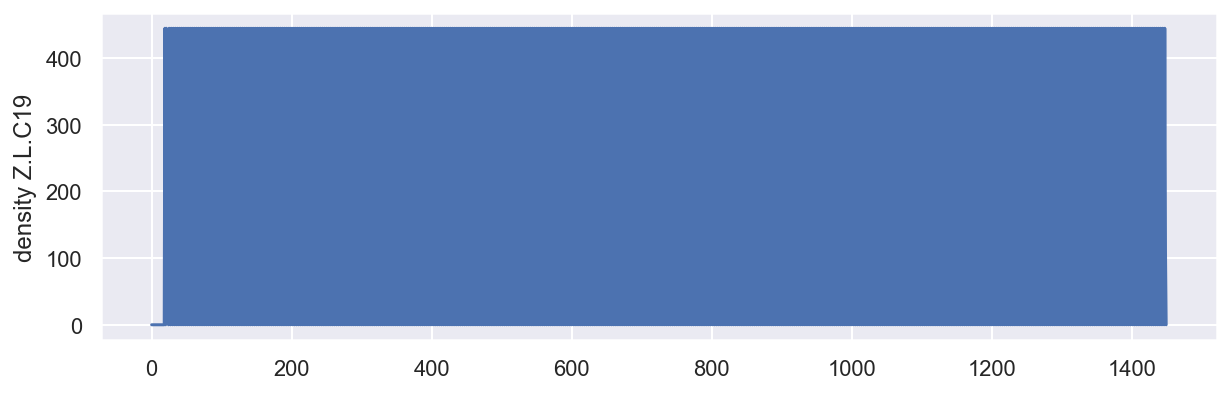

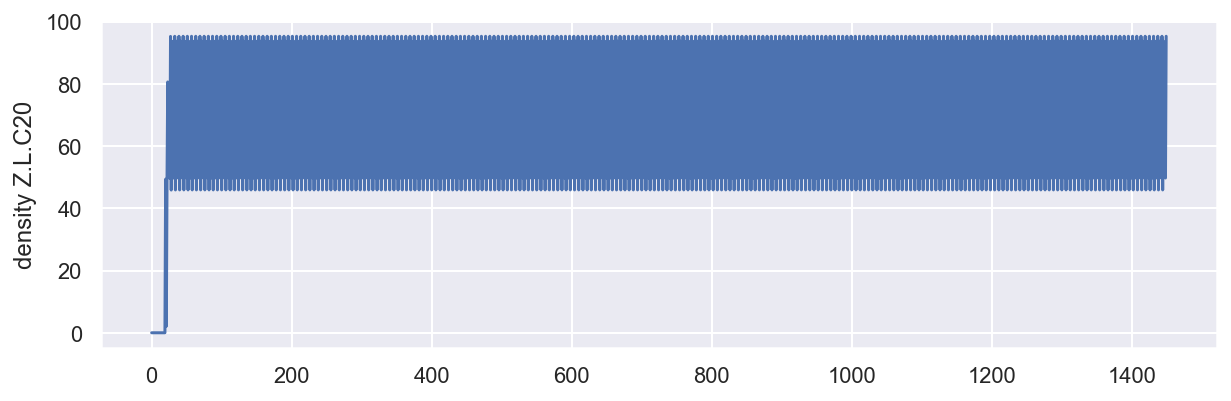

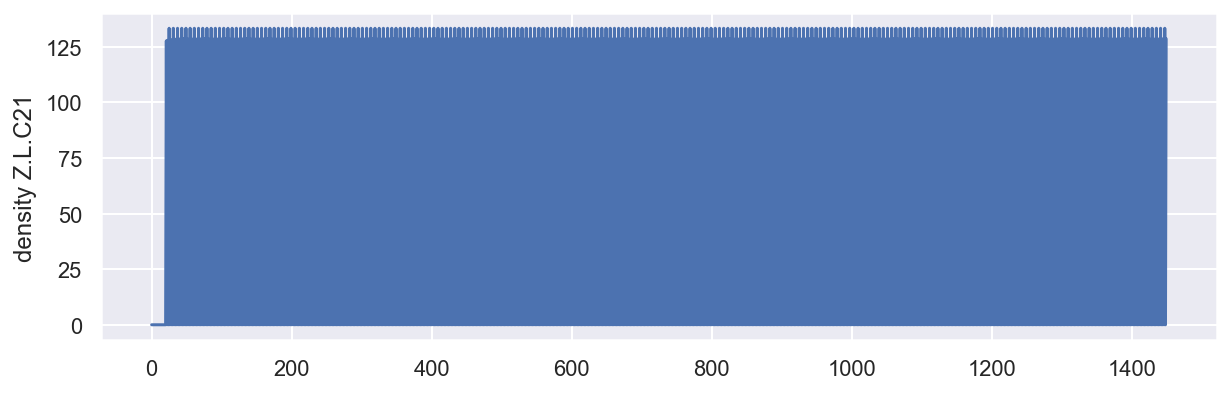

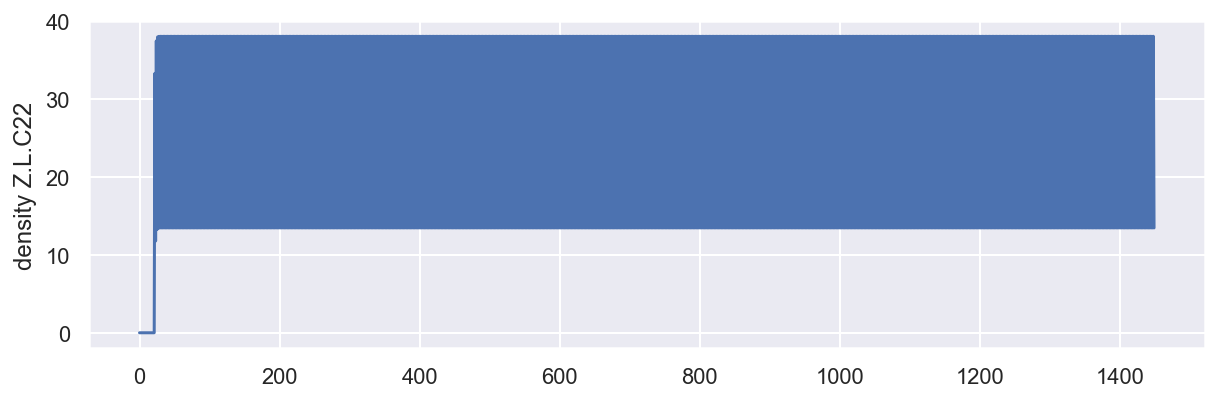

In [34]:
n_cells = len(df_flip.columns)

# fig,axes = plt.subplots(figsize=(10, 3*n_cells), nrows=n_cells)

for i in range(n_cells):
    fig, ax = plt.subplots(figsize=(10, 3))
    # ax = axes[i]
    name = df_flip.columns[i]
    ax.plot(df_flip[name])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel(f'density {name}')
    plt.show()
#axes[-1].set_xlabel('time')

KeyError: '..M0'

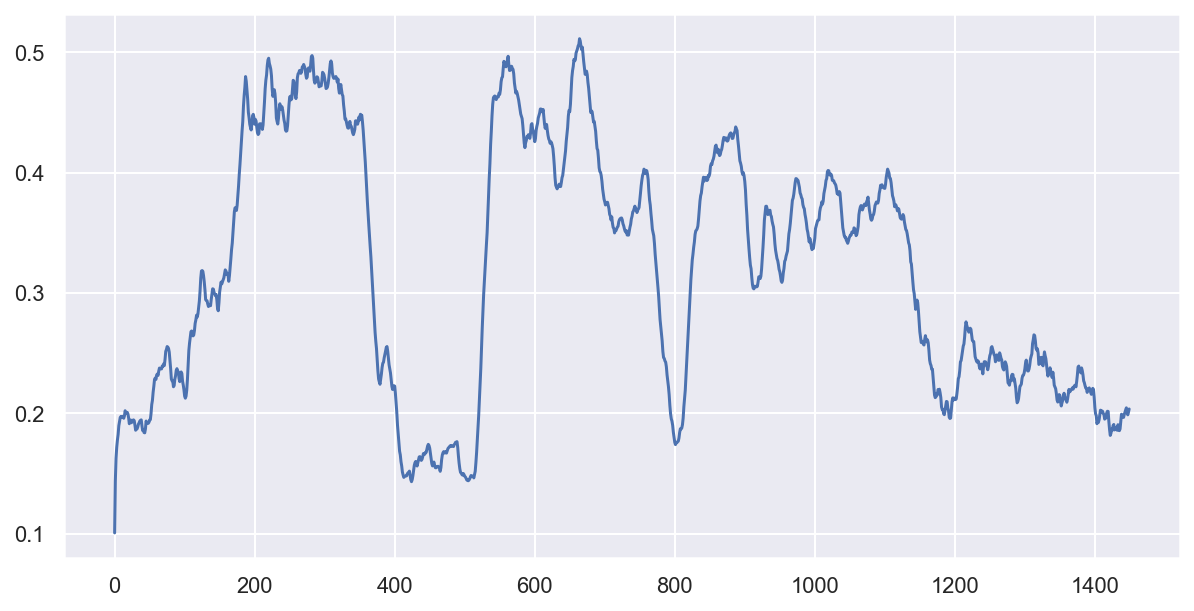

In [35]:
fig,ax = plt.subplots(figsize=(10, 5))


ax.plot(df_flip['Z.L.C0'], label='C0')
ax.plot(df_flip['..M0'], label='C0')

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('time')
ax.set_ylabel('density')

# ax2 = ax.twinx()
# ax2.plot(np.arange(endtime-begin), density[begin:endtime], label='Real density - C0')  

ax.plot(np.arange(endtime-begin), density[begin:endtime], label='Real density - C0') 

# Reflection to the result

In brief, this model has many parameters. That needed to be set. If we had data for each cell and ramp, we could set those parameters with certain level of confidence. The problem is that data used in the model are only from the two detectors and length of the cells. That make it difficult to restrain and set parameters with confident. The next step of calibration is to concentrate arrival rate and discharge rate for the on- and off-ramp, in order to reduce ambiguous parameters in our model to obtain realistic result. 

In [ ]:
fig,ax = plt.subplots(figsize=(10, 5))


ax.plot(df_flip['Z.L.C22'], label='C22')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('time')
ax.set_ylabel('density')

ax.plot(np.arange(endtime-begin), density_s[begin:endtime], label='Real density - C22')  # K

# Smooth ??

In [39]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [40]:
smooth_density = smooth(density, 60)
smooth_flow = smooth(flow, 60)
smooth_speed = smooth(speed, 60)

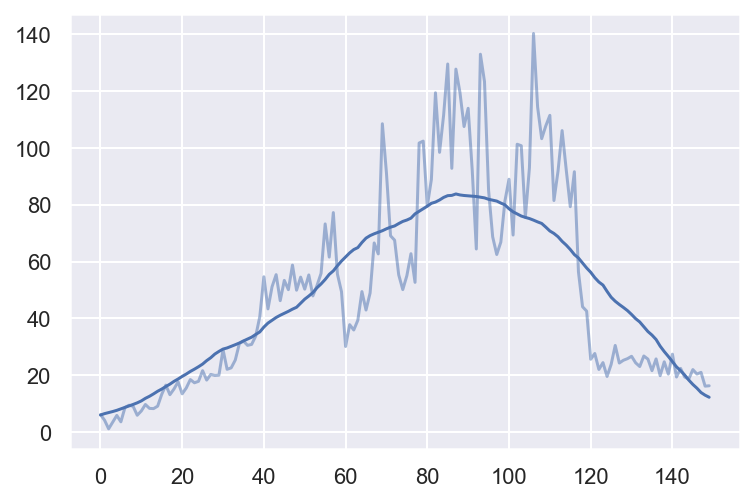

In [41]:
fig, ax = plt.subplots()
ax.plot(density, alpha=0.5, color='C0')
ax.plot(smooth_density, color='C0');

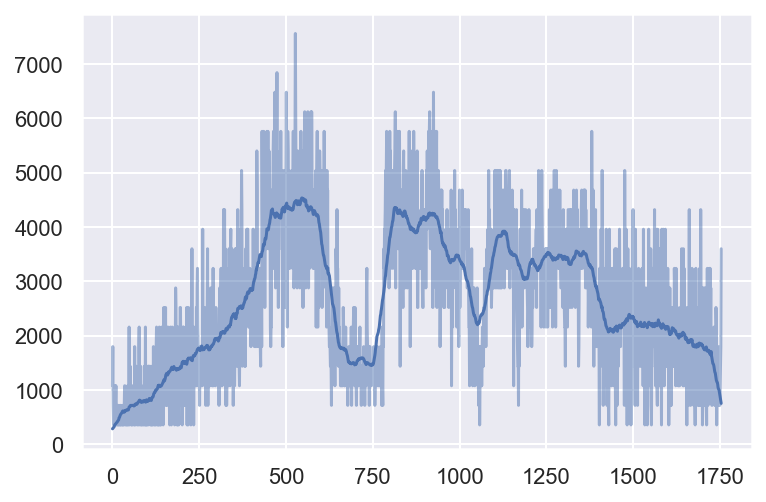

In [9]:
fig, ax = plt.subplots()
ax.plot(flow, alpha=0.5, color='C0')
ax.plot(smooth_flow, color='C0');

In [10]:
flow = smooth_flow
density = smooth_density
speed = smooth_speed

# Optimize ??

In [417]:
def optimize(density):
    def run(param):
        
        kjam, factor = np.log(1 + np.exp(param))
        Cell.idcase = {}

        time_interval = 10
        # kjam = 300 # np.inf  # np.min(flow) / np.min(flow)
        qmax = np.max(flow)
        vf = 90  # np.max(speed)
        w = np.min(speed)

        C0 = Cell(f'C0',
                  time_interval=time_interval, k=0, 
                  qmax=qmax, kjam=kjam,
                  vf=vf, w=w, length=0.5)   

        cells = [C0, ]

        est_density = np.zeros(len(density))

        for t in range(len(density)):

            C0.arr_rate = flow[t]
            C0.dis_rate =  factor*flow_s[t]
            for c in cells:
                c.updateDensity()
            for i, c in enumerate(cells):
                c.updated = False
            est_density[t] = cells[0].k
        
        error = np.sum(np.sqrt((est_density - density)**2))
        return error
    
    res = scipy.optimize.minimize(run, x0=np.zeros(2))
    return res, np.log(1+np.exp(res.x))

In [418]:
res, opt_param = optimize(density=smooth_density)
print(res)
print(opt_param)

<ipython-input-417-78fde7e0363d>:4: RuntimeWarning: overflow encountered in exp
  kjam, factor = np.log(1 + np.exp(param))


      fun: 1811.65771146481
 hess_inv: array([[2.44850011e-02, 4.82519093e-14],
       [4.82519093e-14, 1.80773851e-10]])
      jac: array([0.07038879, 6.19035339])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 552
      nit: 13
     njev: 180
   status: 2
  success: False
        x: array([ 8.97938414e+01, -5.47281195e-02])
[89.7938414   0.66615747]


In [419]:
kjam, factor = opt_param

Cell.idcase = {}

time_interval = 10
# kjam = 300 # np.inf  # np.min(flow) / np.min(flow)
qmax = np.max(flow)
vf = 90  # np.max(speed)
w = np.min(speed)

C0 = Cell(f'C0',
          time_interval=time_interval, k=0, 
          qmax=qmax, kjam=kjam,
          vf=vf, w=w, length=0.5)   

cells = [C0, ]

est_density = np.zeros(len(density))

for t in range(len(density)):

    C0.arr_rate = flow[t]
    C0.dis_rate =  1.82*flow_s[t]
    for c in cells:
        c.updateDensity()
    for i, c in enumerate(cells):
        c.updated = False
    est_density[t] = cells[0].k

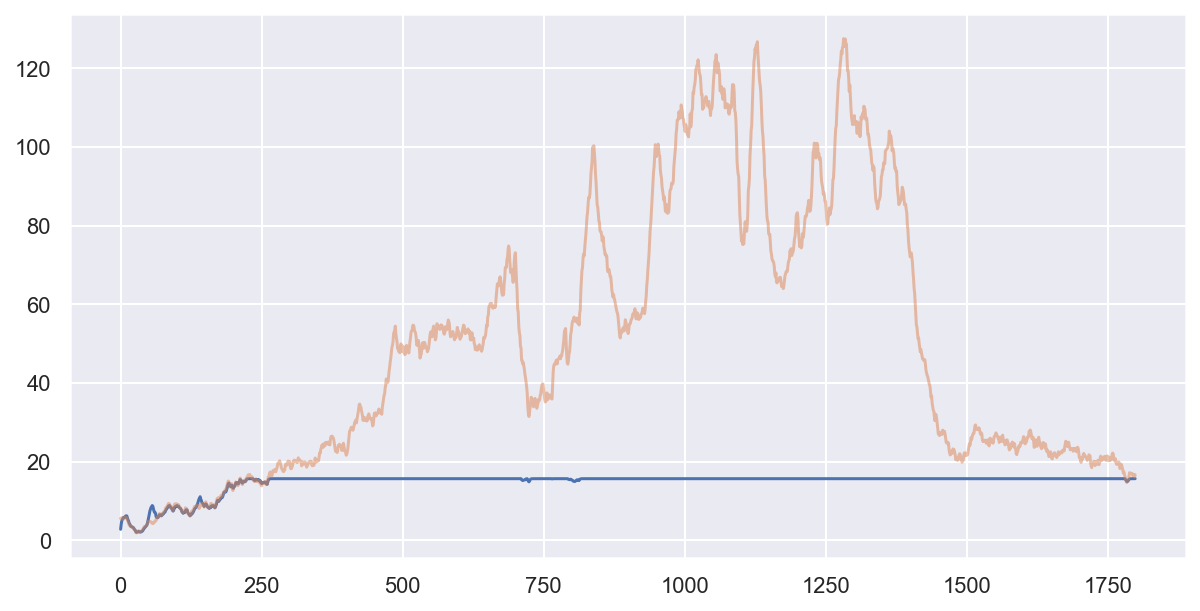

In [420]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(est_density[:])
ax.plot(density[:], alpha=0.5);
# ax.plot(flow_s[:]/60, alpha=0.5);